# **Summary - Milestone 2**:

- Make a **Baseline learning** notebook carrying, some sort of linear or logistic regression (to be used as a benchmark; feel free to use `sklearn`). Details left to you, but explain what you are doing in text cells in the notebook.

<br>

**Team Contributions**

The work of this notebook was distributed as follows:

| Name              | Contribution | Details                    |
|-------------------|--------------|----------------------------|
| Shashank Kushwaha |    25%       | Coordinate the group, started draft of `Baseline learning` code, tested first selection of features.   |
| Johann J Cardenas |    25%       | Analyzed NaNs, checked features importance.  |
| Manoj Lakshmi     |    25%       | Debbuged code, added visualizations, checked progress   |
| Nghia Dai Nguyen  |    25%       | Added analysis, refined comments, added visualizations |

This distribution of effort was approved by

- Shashank Kushwaha (sk89@illinois.edu )
- Johann Cardenas Huaman (johannc2@illinois.edu)
- Manoj Lakshmi (lmanoj2@illinois.edu)
- Nghia Dai Nguyen (nghiadn2@illinois.edu)

In [ ]:
# Importing Libraries
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import time
import pickle
import os

In [ ]:
# Connecting to Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

# Initilizing directory names
base_dir = 'drive/MyDrive/Deep_Dive_Project_Group_12'  # root directory
data_dir = os.path.join(base_dir, 'data_new')          # data directory

file_path = os.path.join(data_dir, 'all.pkl')

with open(file_path, 'rb') as file:
    data = pickle.load(file)

# Check the type, keys (if dictionary or DataFrame columns), and shape (if applicable)
data_type = type(data)
data_keys = data.keys() if hasattr(data, 'keys') else None
data_shape = data.shape if hasattr(data, 'shape') else None

data_type, data_keys, data_shape

(pandas.core.frame.DataFrame,
 Index(['feature.area_code', 'feature.area_title', 'feature.naics_code',
        'feature.naics_title', 'feature.occupation_code',
        'feature.occupation_title', 'feature.total_employees',
        'feature.percentage_total', 'misc.year', 'label.mean_hourly_wage',
        'label.mean_annual_wage', 'feature.new_college_degree',
        'feature.avg_temperature', 'feature.precipitation'],
       dtype='object'),
 (2661307, 14))

In [ ]:
# Count the number of rows with any NaN values in the DataFrame
nan_row_count = data.isna().any(axis=1).sum()
nan_row_count

722248

In [ ]:
# Drop rows with any NaN values from the DataFrame
data_cleaned = data.dropna()

# Check the new shape of the DataFrame after dropping NaN rows
data_cleaned_shape = data_cleaned.shape
data_cleaned_shape

(1939059, 14)

In [ ]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler




In [ ]:
### Using all features. Categorical + Numerical


# Drop rows with any NaN values
data_cleaned = data.dropna().sample(n=5000, random_state=42)

# Categorical columns
categorical_columns = [
    'feature.area_code',
    'feature.area_title',
    'feature.naics_code',
    'feature.naics_title',
    'feature.occupation_code',
    'feature.occupation_title'
]

# Apply OneHotEncoding to categorical columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_categorical = encoder.fit_transform(data_cleaned[categorical_columns])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

# Separate numeric features, scale them, and combine with one-hot encoded features
numeric_features = data_cleaned.drop(columns=categorical_columns + ['label.mean_hourly_wage', 'label.mean_annual_wage'])
scaler = StandardScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features)
numeric_features_scaled_df = pd.DataFrame(numeric_features_scaled, columns=numeric_features.columns)

# Combine scaled numeric features with one-hot encoded categorical features
features = pd.concat([numeric_features_scaled_df.reset_index(drop=True), encoded_categorical_df.reset_index(drop=True)], axis=1)

# Separate labels
labels = data_cleaned[['label.mean_hourly_wage', 'label.mean_annual_wage']].reset_index(drop=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate model performance for each label
mse_hourly = mean_squared_error(y_test['label.mean_hourly_wage'], y_pred[:, 0])
mae_hourly = mean_absolute_error(y_test['label.mean_hourly_wage'], y_pred[:, 0])
r2_hourly = r2_score(y_test['label.mean_hourly_wage'], y_pred[:, 0])

mse_annual = mean_squared_error(y_test['label.mean_annual_wage'], y_pred[:, 1])
mae_annual = mean_absolute_error(y_test['label.mean_annual_wage'], y_pred[:, 1])
r2_annual = r2_score(y_test['label.mean_annual_wage'], y_pred[:, 1])

# Print evaluation metrics
print("Hourly Wage - MSE:", mse_hourly, "MAE:", mae_hourly, "R2:", r2_hourly)
print("Annual Wage - MSE:", mse_annual, "MAE:", mae_annual, "R2:", r2_annual)


In [ ]:
####   trial with numerical features only

# Drop rows with any NaN values
data_cleaned = data.dropna()

# Select only numerical columns (excluding categorical columns)
numerical_features = data_cleaned.drop(columns=[
    'feature.area_code',
    'feature.area_title',
    'feature.naics_code',
    'feature.naics_title',
    'feature.occupation_code',
    'feature.occupation_title',
    'label.mean_hourly_wage',
    'label.mean_annual_wage'
])

# Scale the numerical features
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)
numerical_features_scaled_df = pd.DataFrame(numerical_features_scaled, columns=numerical_features.columns)

# Separate labels
labels = data_cleaned[['label.mean_hourly_wage', 'label.mean_annual_wage']].reset_index(drop=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(numerical_features_scaled_df, labels, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate model performance for each label
mse_hourly = mean_squared_error(y_test['label.mean_hourly_wage'], y_pred[:, 0])
mae_hourly = mean_absolute_error(y_test['label.mean_hourly_wage'], y_pred[:, 0])
r2_hourly = r2_score(y_test['label.mean_hourly_wage'], y_pred[:, 0])

mse_annual = mean_squared_error(y_test['label.mean_annual_wage'], y_pred[:, 1])
mae_annual = mean_absolute_error(y_test['label.mean_annual_wage'], y_pred[:, 1])
r2_annual = r2_score(y_test['label.mean_annual_wage'], y_pred[:, 1])

# Print evaluation metrics
print("Hourly Wage - MSE:", mse_hourly, "MAE:", mae_hourly, "R2:", r2_hourly)
print("Annual Wage - MSE:", mse_annual, "MAE:", mae_annual, "R2:", r2_annual)

Hourly Wage - MSE: 205.72376271413273 MAE: 10.367288015804109 R2: 0.18641035887568536
Annual Wage - MSE: 890043164.4246918 MAE: 21563.963712419983 R2: 0.18640933273604332


** **Insights** **
Trained the Linear regression model with all the features to obtain a baseline performance. Then trained the model by removing one feature at a time to evaluate feature importance. The corresponding plots are presented at the end.

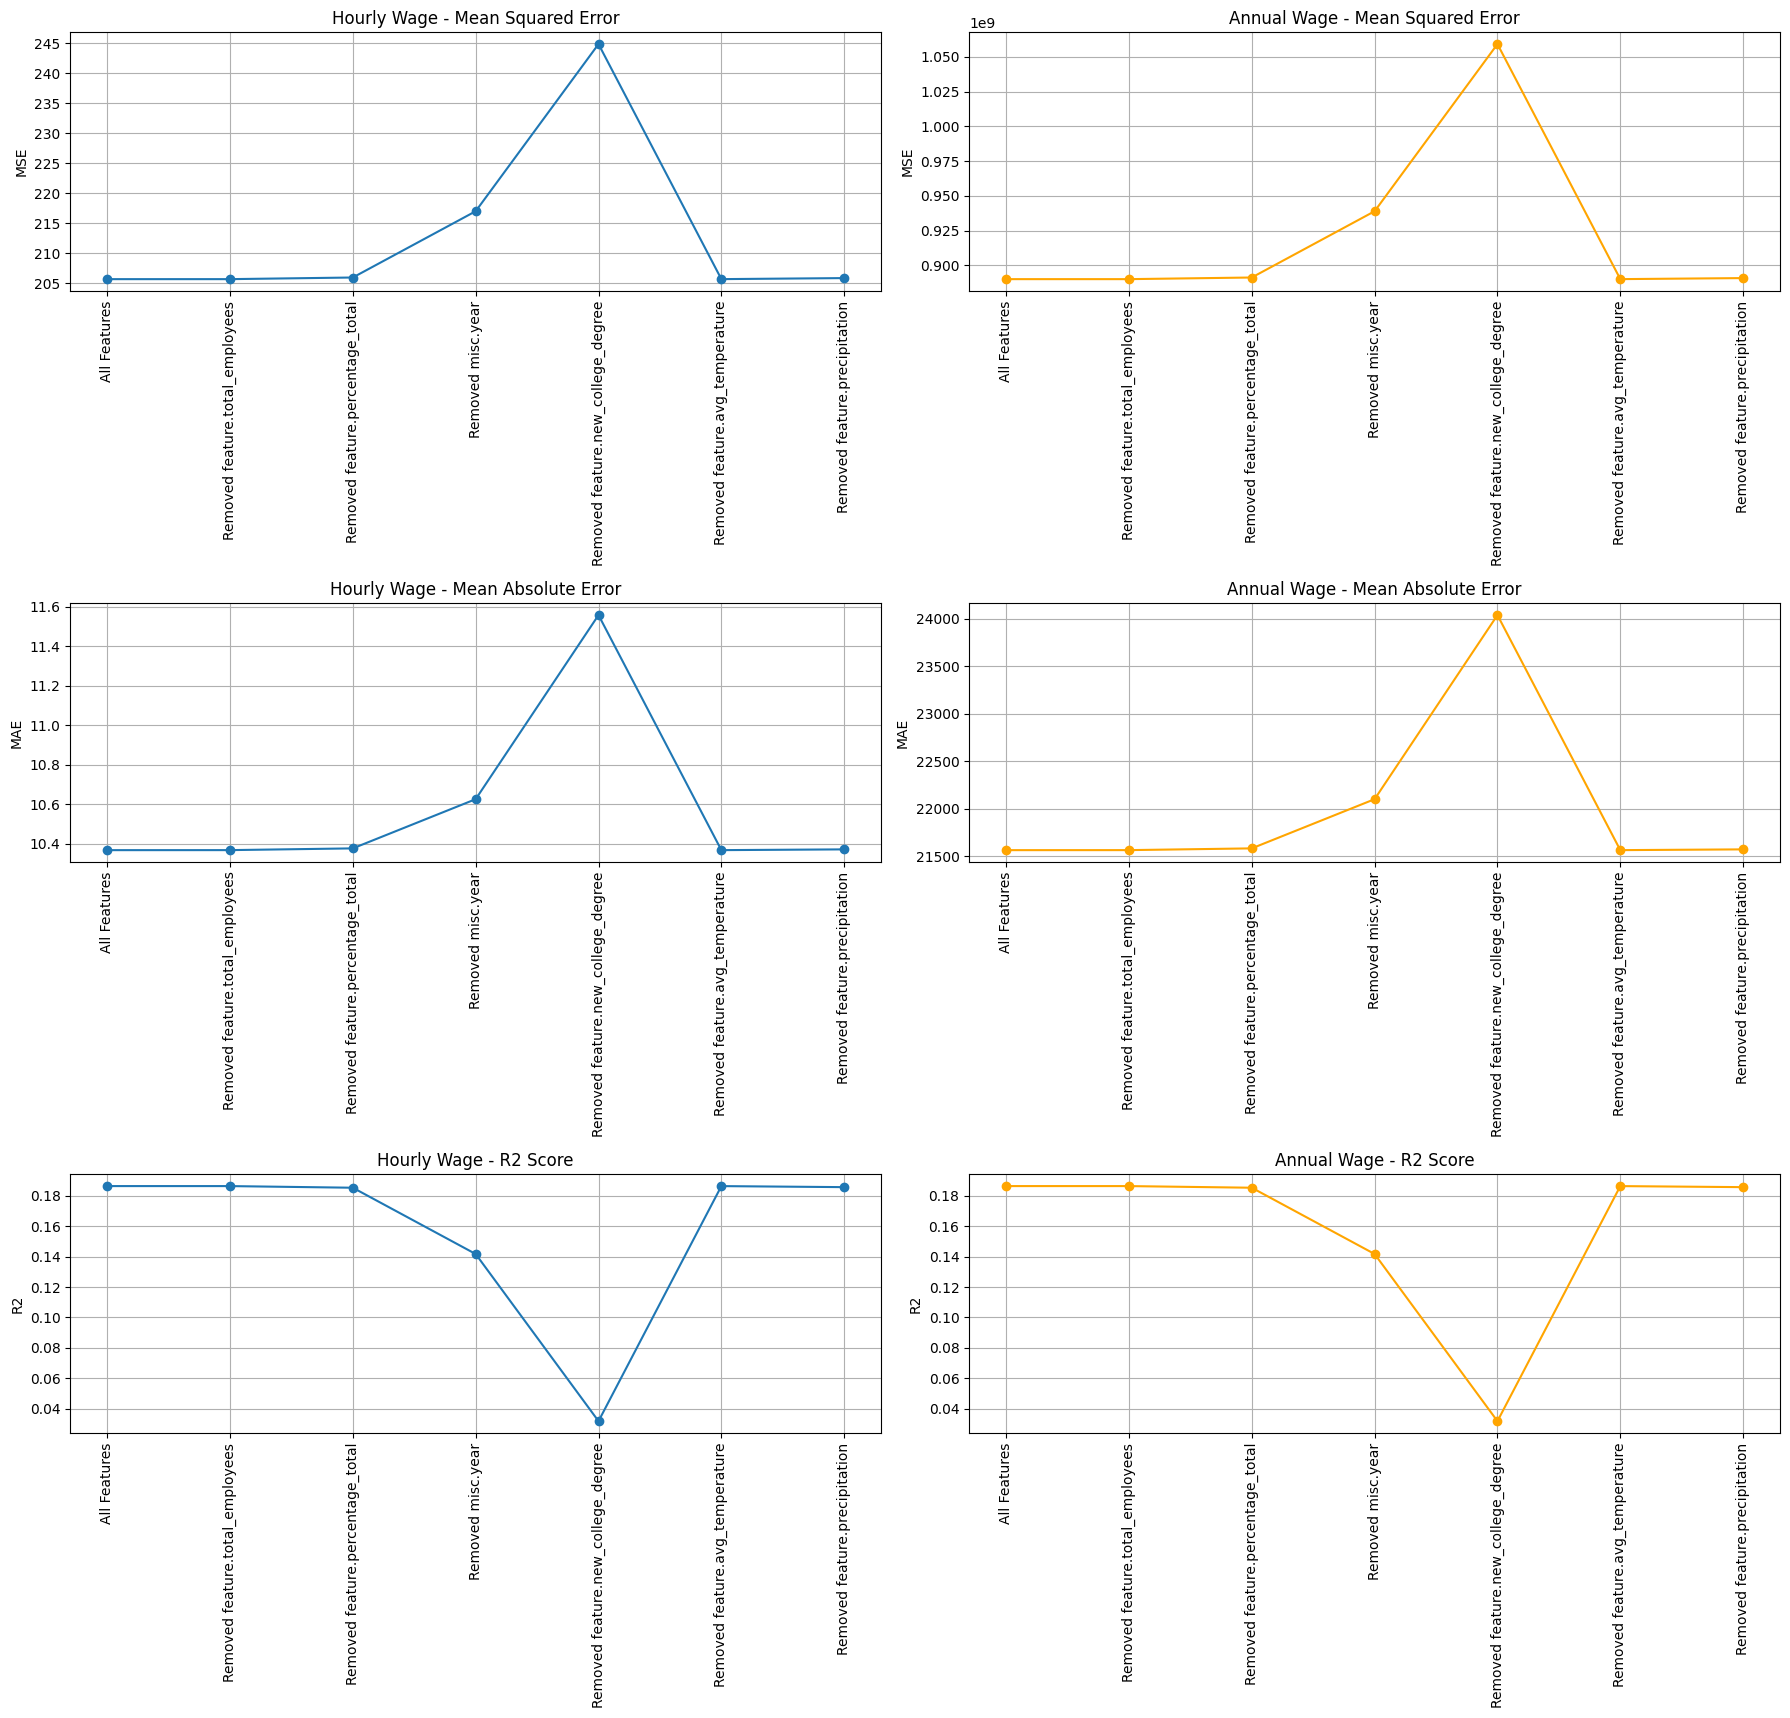

In [ ]:


import matplotlib.pyplot as plt

# Drop rows with any NaN values
data_cleaned = data.dropna()

# Select only numerical columns (excluding categorical columns)
numerical_features = data_cleaned.drop(columns=[
    'feature.area_code',
    'feature.area_title',
    'feature.naics_code',
    'feature.naics_title',
    'feature.occupation_code',
    'feature.occupation_title',
    'label.mean_hourly_wage',
    'label.mean_annual_wage'
])

# Scale the numerical features
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)
numerical_features_scaled_df = pd.DataFrame(numerical_features_scaled, columns=numerical_features.columns)

# Separate labels
labels = data_cleaned[['label.mean_hourly_wage', 'label.mean_annual_wage']].reset_index(drop=True)

# Initialize dictionaries to store results
mse_results = {'Hourly Wage': [], 'Annual Wage': []}
mae_results = {'Hourly Wage': [], 'Annual Wage': []}
r2_results = {'Hourly Wage': [], 'Annual Wage': []}
feature_combinations = []

# Baseline: Train on all features
X_train, X_test, y_train, y_test = train_test_split(numerical_features_scaled_df, labels, test_size=0.2, random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

# Calculate and store metrics for the full model
mse_results['Hourly Wage'].append(mean_squared_error(y_test['label.mean_hourly_wage'], y_pred[:, 0]))
mae_results['Hourly Wage'].append(mean_absolute_error(y_test['label.mean_hourly_wage'], y_pred[:, 0]))
r2_results['Hourly Wage'].append(r2_score(y_test['label.mean_hourly_wage'], y_pred[:, 0]))

mse_results['Annual Wage'].append(mean_squared_error(y_test['label.mean_annual_wage'], y_pred[:, 1]))
mae_results['Annual Wage'].append(mean_absolute_error(y_test['label.mean_annual_wage'], y_pred[:, 1]))
r2_results['Annual Wage'].append(r2_score(y_test['label.mean_annual_wage'], y_pred[:, 1]))
feature_combinations.append('All Features')

# Iterate over each feature to train models without it
for feature in numerical_features.columns:
    modified_features = numerical_features_scaled_df.drop(columns=[feature])
    X_train, X_test, y_train, y_test = train_test_split(modified_features, labels, test_size=0.2, random_state=42)

    # Train and predict with modified feature set
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred = linear_model.predict(X_test)

    # Results for each target variable
    mse_results['Hourly Wage'].append(mean_squared_error(y_test['label.mean_hourly_wage'], y_pred[:, 0]))
    mae_results['Hourly Wage'].append(mean_absolute_error(y_test['label.mean_hourly_wage'], y_pred[:, 0]))
    r2_results['Hourly Wage'].append(r2_score(y_test['label.mean_hourly_wage'], y_pred[:, 0]))

    mse_results['Annual Wage'].append(mean_squared_error(y_test['label.mean_annual_wage'], y_pred[:, 1]))
    mae_results['Annual Wage'].append(mean_absolute_error(y_test['label.mean_annual_wage'], y_pred[:, 1]))
    r2_results['Annual Wage'].append(r2_score(y_test['label.mean_annual_wage'], y_pred[:, 1]))
    feature_combinations.append(f'Removed {feature}')

# plotting Annual and Hourly wage metrics
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# Hourly Wage Metrics
# MSE Plot for Hourly Wage
axes[0, 0].plot(feature_combinations, mse_results['Hourly Wage'], label='Hourly Wage MSE', marker='o')
axes[0, 0].set_title("Hourly Wage - Mean Squared Error")
axes[0, 0].set_ylabel("MSE")
axes[0, 0].grid(True)
axes[0, 0].tick_params(axis='x', rotation=90)

# MAE Plot for Hourly Wage
axes[1, 0].plot(feature_combinations, mae_results['Hourly Wage'], label='Hourly Wage MAE', marker='o')
axes[1, 0].set_title("Hourly Wage - Mean Absolute Error")
axes[1, 0].set_ylabel("MAE")
axes[1, 0].grid(True)
axes[1, 0].tick_params(axis='x', rotation=90)

# R2 Plot for Hourly Wage
axes[2, 0].plot(feature_combinations, r2_results['Hourly Wage'], label='Hourly Wage R2', marker='o')
axes[2, 0].set_title("Hourly Wage - R2 Score")
axes[2, 0].set_ylabel("R2")
axes[2, 0].grid(True)
axes[2, 0].tick_params(axis='x', rotation=90)

# Annual Wage Metrics
# MSE Plot for Annual Wage
axes[0, 1].plot(feature_combinations, mse_results['Annual Wage'], label='Annual Wage MSE', marker='o', color='orange')
axes[0, 1].set_title("Annual Wage - Mean Squared Error")
axes[0, 1].set_ylabel("MSE")
axes[0, 1].grid(True)
axes[0, 1].tick_params(axis='x', rotation=90)

# MAE Plot for Annual Wage
axes[1, 1].plot(feature_combinations, mae_results['Annual Wage'], label='Annual Wage MAE', marker='o', color='orange')
axes[1, 1].set_title("Annual Wage - Mean Absolute Error")
axes[1, 1].set_ylabel("MAE")
axes[1, 1].grid(True)
axes[1, 1].tick_params(axis='x', rotation=90)

# R2 Plot for Annual Wage
axes[2, 1].plot(feature_combinations, r2_results['Annual Wage'], label='Annual Wage R2', marker='o', color='orange')
axes[2, 1].set_title("Annual Wage - R2 Score")
axes[2, 1].set_ylabel("R2")
axes[2, 1].grid(True)
axes[2, 1].tick_params(axis='x', rotation=90)

plt.tight_layout(rect=[0, 0.04, 1, 1])
plt.show()